# BUILDING A 3 LAYER NEURAL NETWORK and Training it on 3 different datasets. (Achieving 99.5% accuracy)

### Datasets-
    - Simple X and y training set
    - make_moons dataset
    - make_circles dataset
    
Training the dataset on the 3 layer Neural Network and plotting the decision boundary.

### Steps for the model:

- Importing important libraries (using numpy for computations, matplotlib.pyplot for plotting and sklearn for getting make_moons and make_circles dataset and also for train test splitting of the dataset)
- defining activations functions (sigmoid and Relu)
- different initialization methods (zeros initialization, random initialization and 'he' initialization)
- defining forward_propagation function for computing forward propagation, compute_cost function for computing cost and backward_propagation function for gradients computations.
- update_parameters function will update parameters, predict function will compute y_hat from final computed weights and biases.
- def model() will train the model and compute all the steps in ordered manner.

#### After defining all these functions, we pass required dataset and hyperparameters to the model and will get updated bias and weights in parameters dictionary. This parameter then passed to predict will finally predict the model output and accuracy.

#### plot_decision_boundary function is defined that will plot the decision boundary for the dataset.

** here 3 layer Neural Network model is computed with nodes [n_x, 6, 4, n_y] and with hyperparameters num_iterations = 15000 and learning_rate 0.01 and 0.03. Better or different model requires changing of hyperparameters like number of layers of NN, nodes in each NN layer, activation functions, weights initializations, learning_rate, num_iterations, etc


## Accuracy achieved in all models - 

### Simple X and y dataset model - 
    zeros initialization - 60% accuracy
    random initialization - 60% accuracy
    he initialization - varies from 80% to 100% accuracy
    
### make_moons - 
    train set accuracy - 99.5%
    test set accuracy - 99.5%
    
### make_circles -
    train set accuracy - 96%
    test set accuracy - 64%

## Importing libraries

In [1]:
# IMPORTING LIBRARIES
# - Numpy - for model coding
# - matplotlib pyplot for plotting

import numpy as np
import matplotlib.pyplot as plt

## Defining functions

In [2]:
# Sigmoid activation function
def sigmoid(z):
    """
    Calculate the activation value sigmoid of a given input.
    
    Input: z (array/matrix of neurons)
    Output: returns sigmoid values of the array/matrix passed.
    """
    return 1/(1 + np.exp(-z))


# ReLU activation function
def relu(z):
    """
    Calculate the activation value ReLU of a given input.
    
    Input: z (array/matrix of neurons)
    Output: returns relu values of the array/matrix passed.
    """
    return np.maximum(0, z)

In [3]:
def forward_propagation(X, parameters):
    """
    Compute the forward propagation and returns the activation values, weights, biases and values of each neuron layers.
    Here we consider our model having 3 neuron layers.
    
    Input: X - Input layer X (shape: n_x, m)
           parameters: dictionary containing weights and biases of each layer of neurons
           
    Output: a3, cache
        a3: last layer neurons activation values (calculated on sigmoid function)
        cache: contains weights, biases, neuron activation and calculated values. To be used during backpropagation.
    """
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    w3 = parameters['w3']
    b3 = parameters['b3']
    
    z1 = np.dot(w1, X) + b1
    a1 = relu(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = relu(z2)
    
    z3 = np.dot(w3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, w1, b1, z2, a2, w2, b2, z3, a3, w3, b3)
    
    return a3, cache

In [4]:
def compute_cost(y_hat, y):
    """
    Compute the cost at each iteration.
    
    Inputs: y_hat, y
        y: Actual output layer
        y_hat: predicted output layer from forward propagation.
        
    Output: cost
    """
    m = y.shape[1]
    
    cost = (-1/m)*(np.sum(np.multiply(y, np.log(y_hat)) + np.multiply(1-y, np.log(1 - y_hat))))
    return cost

In [5]:
def backward_propagation(X, y, cache):
    """
    Compute the gradients (dw, db) for each layers of neurons. These values then will be used to update parameters.
    
    Input: X, y, cache
        X: input layer (shape n_x, m)
        y: output layer values (shape 1, m)
        
    Output: gradients (containing value dw and db for each layer of neurons. Also output dz and dA values of layers to be used further.)
    """
    (z1, a1, w1, b1, z2, a2, w2, b2, z3, a3, w3, b3) = cache
    m = X.shape[1]
    
    dz3 = a3 - y
    dw3 = (1/m)*np.dot(dz3, a2.T)
    db3 = (1/m)*np.sum(dz3, axis = 1, keepdims=True)
    
    dA2 = np.dot(w3.T, dz3)
    dz2 = np.multiply(dA2, np.int64(a2 > 0))
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims=True)
    
    dA1 = np.dot(w2.T, dz2)
    dz1 = np.multiply(dA1, np.int64(a1 > 0))
    dw1 = (1/m)*np.dot(dz1, X.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims=True)
    
    gradients = {'dz1': dz1, 'dA1': dA1, 'dw1': dw1, 'db1': db1, 'dz2': dz2, 'dA2': dA2, 'dw2': dw2, 'db2': db2, 'dz3': dz3, 'dw3': dw3, 'db3': db3}
    
    return gradients

In [6]:
def update_parameters(parameters, gradients, learning_rate):
    """
    Updating the parameters.
    w := w - learning_rate*dw
    b := b - learning_rate*db
    
    Input: parameters, gradients, learning_rate
        parameters: contains weights(w) and biases(b) values
        gradients: contains db and dw values
        learning_rate: alpha
        
    Output: parameters with updated values
    """
    L = int(len(parameters)/2)
    
    for l in range(1, L):
        parameters['w' + str(l)] -= learning_rate * gradients['dw' + str(l)]
        parameters['b' + str(l)] -= learning_rate * gradients['db' + str(l)]
        
    return parameters

In [7]:
# Initialization of weights and biases

def zeros_initialization(layers_dims):
    """
    Initialize weights and biases for each layers of neurons, all to zeros.
    shape of each weights: (number of neurons on this layer) X (number of neurons on the previous layer)
    
    Input: layers dims - containing the dimension(number of nodes) of each neuron layers.
    Output: parameters - dictionary containing all weights and biases.
    """
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters['w' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    
    return parameters

def random_initialization(layers_dims):
    """
    Initialize weights and biases for each layers of neurons, all weights initialized randomly using np.randon.randn() -
            gaussian random values initialization.
            All biases initialized to zeros.
    multiplying each weights with smaller values like 0.01, etc to make values initialized even more smaller.
    shape of each weights: (number of neurons on this layer) X (number of neurons on the previous layer)
    
    Input: layers dims - containing the dimension(number of nodes) of each neuron layers.
    Output: parameters - dictionary containing all weights and biases.
    """
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters['w' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    
    return parameters

def he_initialization(layers_dims):
    """
    Initialize weights and biases for each layers of neurons, all weights initialized randomly using np.randon.randn() -
            gaussian random values initialization. Then using he initialization.
            All biases initialized to zeros.
    He initialization - multiplying each weights with np.sqrt(2/size of previous layer neurons) for better values initialization.
    shape of each weights: (number of neurons on this layer) X (number of neurons on the previous layer)
    
    Input: layers dims - containing the dimension(number of nodes) of each neuron layers.
    Output: parameters - dictionary containing all weights and biases.
    """
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters['w' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    
    return parameters

In [8]:
def model(X, y, initialization, num_iterations = 15000, learning_rate = 0.03, print_cost = True):
    """
    This functions takes X, y and hyperparameters like number of iteration and learning rate and train the dataset on the model coded here.
    Computes the final parameters and cost after all the iterations and plot Cost v/s #iterations.
    
    Here in this model, we passed num_iterations 15000 and learning_rate 0.03.
    Also, the model modelled here has 3 neuron layers with nodes 6, 4 and n_y(shape[0] of y) for each layers respectively.
    
    Input: X, y, initialization, num_iterations, learning_rate, print_cost
        X: training set (shape n_x, m) - model to be trained on this dataset
        y: value corresponding to each training set data
        initialization: can be zeros/random/he and initialize the weights and baises based on method inputted here.
        num_iterations: number of iterations to compute gradient descent
        learning_rate: learning rate for gradient descent. Used in updating parameters
        
    Output: parameters - updated parameters after all the iterations
    """
    m = X.shape[1]
    n_x = X.shape[0]
    n_y = y.shape[0]
    layers_dims = [n_x, 6, 4, n_y]
    
    if initialization == "zeros":
        parameters = zeros_initialization(layers_dims)
    elif initialization == "random":
        parameters = random_initialization(layers_dims)
    elif initialization == "he":
        parameters = he_initialization(layers_dims)
        
    costs = []
    for i in range(num_iterations):
        a3, cache = forward_propagation(X, parameters)
        cost = compute_cost(a3, y)
        gradients = backward_propagation(X, y, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        if print_cost and i%1000 == 0:
            print(f"Cost after {i} iterations:", cost)
            costs.append(cost)
          
    plt.plot(costs)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost v/s iterations")
    plt.show()
    
    return parameters

In [9]:
def predict(X, y, parameters):
    """
    After getting final updated parameters from all the iterations, this function returns the binary computed value for 
    all the values computed using these parameters.
    If values is >= 0.5, we update it to 1 and if <0.5, value is updated to 0. (the final value array is y_hat)
    
    Input: X, y, parameters
        X: input array
        y: output array
        parameters: finally updated values of weights and biases
        
    Output: y_hat (final predicted values of each data set) - calculated from a3 values from forward propagation using inputted parameters
    Also accuracy is calculated using y and y_hat values.
    """
    m = X.shape[1]
    a3, cache = forward_propagation(X, parameters)
    y_hat = np.zeros((1, m))
    
    for i in range(a3.shape[1]):
        if a3[0, i] >= 0.5:
            y_hat[0, i] = 1
        else:
            y_hat[0, i] = 0
            
    accuracy = np.mean((y_hat[0,:] == y[0,:]))
    print("Accuracy", accuracy)
    return y_hat

# Learning example 1

Here we define X and y of small size by our own and check for the model defined above to check if the model is working properly.

Steps for modelling-
    - define X and y using np.array
    - Train the X and y values with the initialization
    - get predicted values of the trained model from last step

In [10]:
# Defining X and y - X with shape (4, 5) and y corresponds to (1, 5)

X = np.array([[2, 3, 6, 8, 1], [3, 4, 4, 5, 6], [4, 5, 4 ,2, 7], [5, 6, 2, 5, 4]])
y = np.array([[1, 1, 0, 1, 0]])

Cost after 0 iterations: 0.6931471805599454
Cost after 1000 iterations: 0.6931471805599454
Cost after 2000 iterations: 0.6931471805599454
Cost after 3000 iterations: 0.6931471805599454
Cost after 4000 iterations: 0.6931471805599454
Cost after 5000 iterations: 0.6931471805599454
Cost after 6000 iterations: 0.6931471805599454
Cost after 7000 iterations: 0.6931471805599454
Cost after 8000 iterations: 0.6931471805599454
Cost after 9000 iterations: 0.6931471805599454
Cost after 10000 iterations: 0.6931471805599454
Cost after 11000 iterations: 0.6931471805599454
Cost after 12000 iterations: 0.6931471805599454
Cost after 13000 iterations: 0.6931471805599454
Cost after 14000 iterations: 0.6931471805599454


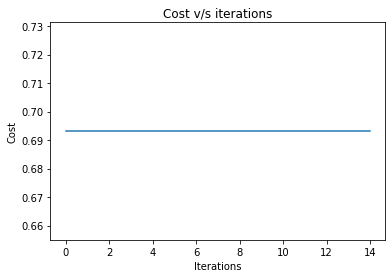

Cost after 0 iterations: 0.6931458737523312
Cost after 1000 iterations: 0.6929536550450822
Cost after 2000 iterations: 0.6927204683171717
Cost after 3000 iterations: 0.6922443194924789
Cost after 4000 iterations: 0.6904122908302318
Cost after 5000 iterations: 0.6819611051861248
Cost after 6000 iterations: 0.654289068480705
Cost after 7000 iterations: 0.6040593264001528
Cost after 8000 iterations: 0.5170761455581645
Cost after 9000 iterations: 0.423618438253604
Cost after 10000 iterations: 0.3542736732785191
Cost after 11000 iterations: 0.3229151611351986
Cost after 12000 iterations: 0.3071695049569077
Cost after 13000 iterations: 0.29883186955588076
Cost after 14000 iterations: 0.29376978372039514


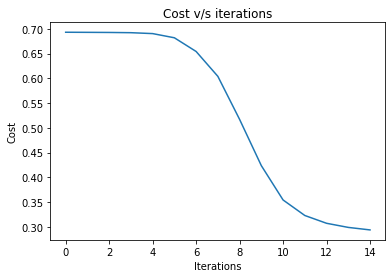

Cost after 0 iterations: 1.414601271714937
Cost after 1000 iterations: 0.004555107126136383
Cost after 2000 iterations: 0.0018248335934647865
Cost after 3000 iterations: 0.0010972945366251898
Cost after 4000 iterations: 0.0007699872822692596
Cost after 5000 iterations: 0.0005871165158979762
Cost after 6000 iterations: 0.0004712142085089477
Cost after 7000 iterations: 0.000391807697899835
Cost after 8000 iterations: 0.0003342623931926207
Cost after 9000 iterations: 0.000290747381440677
Cost after 10000 iterations: 0.0002567601168053011
Cost after 11000 iterations: 0.000229535585951854
Cost after 12000 iterations: 0.00020727966721849271
Cost after 13000 iterations: 0.00018877651345149457
Cost after 14000 iterations: 0.0001731288906981965


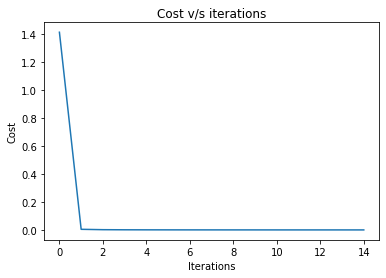

In [11]:
# Training the input and output value using inscribed initialization. It will print cost at after every 1000 iteration and 
#     will plot cost v/s #iterations

# Training using zeros initialization
parameters_z = model(X, y, initialization="zeros")

# Training using random initialization
parameters_r = model(X, y, initialization="random")

# Training using he initialization
parameters_h = model(X, y, initialization="he")

In [12]:
# Getting prediction accuracy and predicted values

prediction_z = predict(X, y, parameters_z)
print("Zeros initialized predicted values", prediction_z)

prediction_r = predict(X, y, parameters_r)
print("Random initialized predicted values", prediction_r)

prediction_h = predict(X, y, parameters_h)
print("He initialized predicted values", prediction_h)

Accuracy 0.6
Zeros initialized predicted values [[1. 1. 1. 1. 1.]]
Accuracy 0.6
Random initialized predicted values [[1. 1. 1. 1. 1.]]
Accuracy 1.0
He initialized predicted values [[1. 1. 0. 1. 0.]]


## On improving the learning rate and number of layers in each networks, accuracy of the model can be improved

# Learning example 2 and 3

### Getting the data from sklearn datasets and training the model. Then plotting the decision boundary based on the predicted results.

Steps for modelling-
    - Getting datasets from sklearn datasets
    - Defining train and test set
    - Train the train set values with the initialization 'he' as this is the best initialised model
    - get predicted values of the trained model from last step
    - getting accuracy for train and test set from the parameters we got from training the model
    - plotting the decision boundary

In [13]:
# Installing the scikit learn library for the datsets

!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\harsh\anaconda3\lib\site-packages (0.0)


In [14]:
# Plot decision boundary function for plotting the decision boundary. 

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()
    
def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3>0.5)
    return predictions

## Learning example 2 (on make moons datset)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


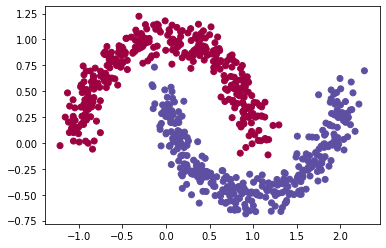

In [15]:
# Getting the make_moons datsets from sklearn datasets and making the plot of it using plt.scatter
# features_set_x and label_y is the X and y datset of shape (m, n) and (m, 1) respectively. Using datsets.make_moons() of sklearn
# to get the dataset values.

from sklearn import datasets

features_set_x, label_y = datasets.make_moons(700, noise=0.1, random_state=0)
plt.scatter(features_set_x[:,0], features_set_x[:,1], c=label_y, cmap=plt.cm.Spectral)

In [16]:
# Dividing the dataset into training and test set. We use train_test_split of sklearn model_selection for the split

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(features_set_x, label_y, test_size=0.33, random_state=42)

# As the dataset we splitted is of shape (m, n) or (m, 1) we transpose the matrix to reverse the shape of matrix.

train_X = train_X.T
test_X = test_X.T
train_y = train_y.reshape(1, train_y.shape[0])
test_y = test_y.reshape(1, test_y.shape[0])

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(2, 469)
(2, 231)
(1, 469)
(1, 231)


Cost after 0 iterations: 0.7328186460674952
Cost after 1000 iterations: 0.2813219414614471
Cost after 2000 iterations: 0.21872321602220818
Cost after 3000 iterations: 0.19784486738156945
Cost after 4000 iterations: 0.1720460898186385
Cost after 5000 iterations: 0.13509467483511145
Cost after 6000 iterations: 0.1023877584898029
Cost after 7000 iterations: 0.07755503046807354
Cost after 8000 iterations: 0.060936750259096555
Cost after 9000 iterations: 0.04975279704082474
Cost after 10000 iterations: 0.041912141186530645
Cost after 11000 iterations: 0.03621145542075303
Cost after 12000 iterations: 0.031864319892894205
Cost after 13000 iterations: 0.028417735450998696
Cost after 14000 iterations: 0.02563483912892081


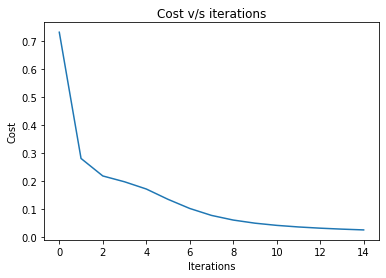

In [17]:
# Training the train set using he initialization. 
# It will return parameters, print cost after every 1000 iteration and plotting cost v/s #iterations.

parameters = model(train_X, train_y, initialization="he")

In [18]:
# Getting prediction accuracy and predicted values of the training set

predictions = predict(train_X, train_y, parameters)

Accuracy 0.9957356076759062


In [19]:
# Getting prediction accuracy and predicted values of the test set

test_predictions = predict(test_X, test_y, parameters)

Accuracy 0.9956709956709957


### Train accuracy: ~99.5%
### Test accuracy: ~99.5%

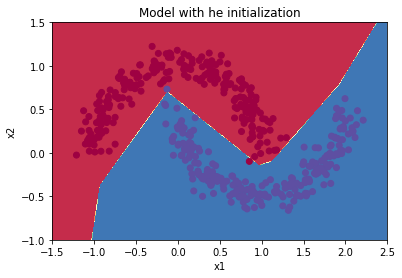

In [20]:
# Plotting the decision boundary using functions defined.

plt.title("Model with he initialization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_y)

## Learning example 3 (on make_circles dataset)

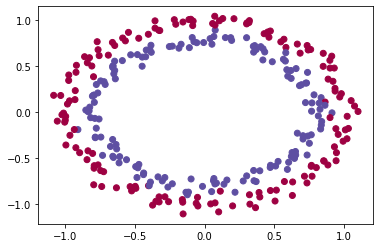

In [21]:
# Getting the make_circles datsets from sklearn datasets and making the plot of it using plt.scatter
# features_set_x and label_y is the X and y datset of shape (m, n) and (m, 1) respectively. Using datsets.make_circles() of sklearn
# to get the dataset values.

from sklearn import datasets

features_set_x, label_y = datasets.make_circles(n_samples=300, noise=.05)
plt.scatter(features_set_x[:,0], features_set_x[:,1], c=label_y, cmap=plt.cm.Spectral)

In [22]:
# Dividing the dataset into training and test set. We use train_test_split of sklearn model_selection for the split

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(features_set_x, label_y, test_size=0.33, random_state=42)

# As the dataset we splitted is of shape (m, n) or (m, 1) we transpose the matrix to reverse the shape of matrix.

train_X = train_X.T
test_X = test_X.T
train_y = train_y.reshape(1, train_y.shape[0])
test_y = test_y.reshape(1, test_y.shape[0])

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(2, 201)
(2, 99)
(1, 201)
(1, 99)


Cost after 0 iterations: 0.7466496657238084
Cost after 1000 iterations: 0.6549277135774306
Cost after 2000 iterations: 0.6290867742526104
Cost after 3000 iterations: 0.6004404975546117
Cost after 4000 iterations: 0.5809844649893466
Cost after 5000 iterations: 0.5612998263297562
Cost after 6000 iterations: 0.5409156601711156
Cost after 7000 iterations: 0.5181929529447378
Cost after 8000 iterations: 0.49422552316180535
Cost after 9000 iterations: 0.47004337675599756
Cost after 10000 iterations: 0.4479971110102118
Cost after 11000 iterations: 0.4230506209123929
Cost after 12000 iterations: 0.39952569189930603
Cost after 13000 iterations: 0.3515162173563694
Cost after 14000 iterations: 0.30738816976056804


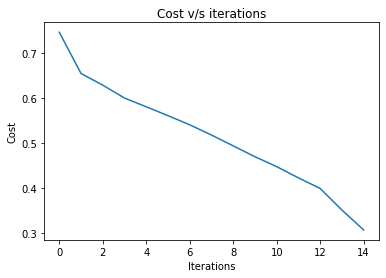

In [23]:
# Training the train set using he initialization. 
# It will return parameters, print cost after every 1000 iteration and plotting cost v/s #iterations.

parameters = model(train_X, train_y, initialization="he", learning_rate=0.01)

In [24]:
# Getting prediction accuracy and predicted values of the training set

predictions = predict(train_X, train_y, parameters)

Accuracy 0.9601990049751243


In [25]:
# Getting prediction accuracy and predicted values of the test set

test_predictions = predict(test_X, test_y, parameters)

Accuracy 0.9393939393939394


### Train accuracy: 96%
### Test accuracy: ~94%

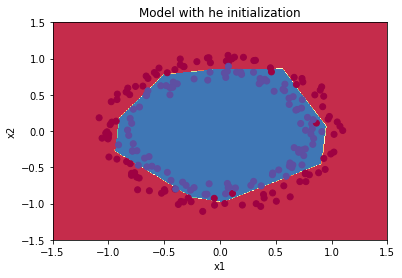

In [26]:
# Plotting the decision boundary using functions defined.

plt.title("Model with he initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_y)

## On improving the learning rate and number of layers in each networks, accuracy of the model can be improved